NETFLIX ANALYSIS DASHBOARD

Unveiling Netflix trends: Exploring content growth, ratings & origin to understand viewers and optimize strategy.




IMPORTING LIBRARIES

In [2]:
## Importing Libaries

import pandas as pd #linear algebra
import numpy as np #data preparation
import plotly.express as px #data visualization
from textblob import TextBlob # sentiment analysis

IMPORTING DATA AND CHECKING CONTENT ON NETFLIX

In [14]:
# Importing Data

df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


CHECKING THE NUMBER OF ROWS AND COLUMNS IN DATA

In [15]:
df.shape

(8807, 12)

TAKING THE COUNT OF RATING AVAILABLE

In [4]:

x= df.groupby(['rating']).size().reset_index(name='counts')
print(x)

      rating  counts
0     66 min       1
1     74 min       1
2     84 min       1
3          G      41
4      NC-17       3
5         NR      80
6         PG     287
7      PG-13     490
8          R     799
9      TV-14    2160
10      TV-G     220
11     TV-MA    3207
12     TV-PG     863
13      TV-Y     307
14     TV-Y7     334
15  TV-Y7-FV       6
16        UR       3


CREATING THE PIECHART BASED ON CONTENT RATING

In [5]:
pieChart = px.pie(x,values='counts', names='rating',title ='Distribution of content on Netflix')
pieChart.show()

ANALYZING TOP FIVE DIRECTORS ON NETFLIX

In [8]:
df['director']=df['director'].fillna("Director not specified")
directors_list= pd.DataFrame()

directors_list = df['director'].str.split(',',expand=True).stack()

directors_list = directors_list.to_frame()

directors_list.columns=['Directors']
directors = directors_list.groupby(['Directors']).size().reset_index(name='total count')
directors=directors[directors.Directors != "Director not specified"]

directors=directors.sort_values(by=['total count'] , ascending=False)
top5Directors =directors.head()

top5Directors =top5Directors.sort_values(by=['total count'])
barChart = px.bar(top5Directors, x='total count',y='Directors',title='Top 5 directors on Netflix' )
barChart.show()



ANALYSING TOP FIVE ACTORS ON NETFLIX

In [9]:
df['cast']=df['cast'].fillna('No cast specified')
cast_df = pd.DataFrame()
cast_df = df['cast'].str.split(',',expand=True).stack()
cast_df = cast_df.to_frame()
cast_df.columns = ['Actor']
actors = cast_df.groupby(['Actor']).size().reset_index(name = 'Total Count')
actors = actors[actors.Actor != 'No cast specified']
actors = actors.sort_values(by=['Total Count'], ascending=False)
top5Actors = actors.head()
top5Actors = top5Actors.sort_values(by=['Total Count'])
barChart2 = px.bar(top5Actors, x='Total Count', y='Actor', title='Top 5 Actors on Netflix')
barChart2.show()
     

DISTRIBUTION OF NETFLIX CONTENT IN COUNTRIES OVER THE WORLD

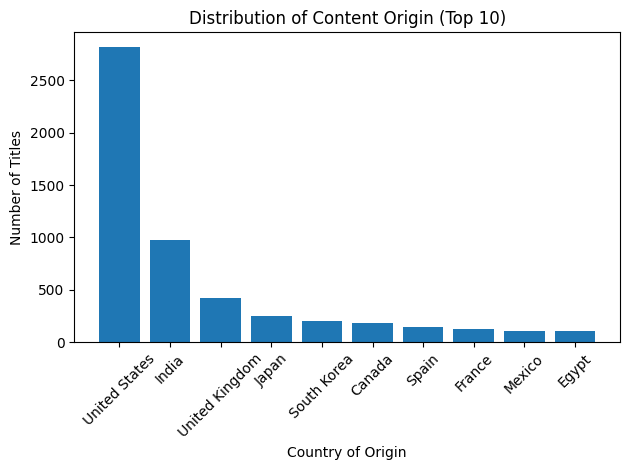

Percentage of Titles by Country (Top 5):
country
United States     31.997275
India             11.036675
United Kingdom     4.757579
Japan              2.781878
South Korea        2.259566
Name: count, dtype: float64


In [10]:
import matplotlib.pyplot as plt
import pandas as pd


country_counts = df['country'].value_counts().sort_values(ascending=False)


plt.bar(country_counts.index[:10], country_counts.values[:10])  # Limit to top 10
plt.xlabel("Country of Origin")
plt.ylabel("Number of Titles")
plt.title("Distribution of Content Origin (Top 10)")
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()


total_titles = len(df)
percent_by_country = (country_counts / total_titles) * 100
print("Percentage of Titles by Country (Top 5):")
print(percent_by_country.head())

TREND OF CONTENT PRODUCED IN NETFLIX OVER THE YEARS

In [12]:
df1=df[['type','release_year']]
df1=df1.rename(columns = {"release_year": "Release Year", "type" : "Type"})
df2=df1.groupby(['Release Year', 'Type']).size().reset_index(name= 'Total Count')
df2=df2[df2['Release Year'] >=2000]
graph =px.line(df2, x="Release Year", y ="Total Count" , color = "Type" , title ="Trend of Content Produced  on Netflix Every Year")
graph.show()

SENTIMENT ANALYSIS OF CONTENT IN NETFLIX

In [13]:
df3 = df[['release_year', 'description']]
df3 = df3.rename(columns = {'release_year':'Release Year', 'description':'Description'})
for index, row in df3.iterrows():
  d=row['Description']
  testimonial = TextBlob(d)
  p = testimonial.sentiment.polarity
  if p==0:
    sent = 'Neutral'
  elif p>0:
    sent = 'Positive'
  else:
    sent = 'Negative'
  df3.loc[[index, 2], 'Sentiment']=sent

df3 = df3.groupby(['Release Year', 'Sentiment']).size().reset_index(name = 'Total Count')

df3 = df3[df3['Release Year']>2005]
barGraph = px.bar(df3, x="Release Year", y="Total Count", color = "Sentiment", title = "Sentiment Analysis of Content on Netflix")
barGraph.show()

In conclusion, these insights empower Netflix to make informed decisions about content acquisition, production, and marketing strategies. By catering to viewer preferences and staying abreast of global trends, Netflix can solidify its position as a leading entertainment provider.